In [1]:
from iuvs import hk
from iuvs.spice import load_kernels
load_kernels()

  warnings.warn(self.msg_depr % (key, alt_key))



In [2]:
from iuvs import io

In [3]:
df = io.get_filename_df('l1a', env='stage')
df = df['2014':'2015']
df.head()

,basename,channel,cycle_orbit,instrument,level,mission,mode,obs_id,orbit,p,phase,revision,root,timestr,tokens,version,version_string
time,,,,,,,,,,,,,,,,,
2014-04-02 16:54:08,mvn_iuv_l1a_cruisecal1-mode011-muvdark_2014040...,muvdark,mode011,iuv,l1a,mvn,N/A,mvn_iuv_l1a_cruisecal1-mode011-muvdark_2014040...,NaN,/maven_iuvs/stage/products/level1a/mvn_iuv_l1a...,cruisecal1,r01,/maven_iuvs/stage/products/level1a,20140402T165408,"[mvn, iuv, l1a, cruisecal1-mode011-muvdark, 20...",v01,v01r01
2014-04-02 16:54:19,mvn_iuv_l1a_cruisecal1-mode011-fuv_20140402T16...,fuv,mode011,iuv,l1a,mvn,N/A,mvn_iuv_l1a_cruisecal1-mode011-fuv_20140402T16...,NaN,/maven_iuvs/stage/products/level1a/mvn_iuv_l1a...,cruisecal1,r01,/maven_iuvs/stage/products/level1a,20140402T165419,"[mvn, iuv, l1a, cruisecal1-mode011-fuv, 201404...",v01,v01r01
2014-04-02 16:54:19,mvn_iuv_l1a_cruisecal1-mode011-muv_20140402T16...,muv,mode011,iuv,l1a,mvn,N/A,mvn_iuv_l1a_cruisecal1-mode011-muv_20140402T16...,NaN,/maven_iuvs/stage/products/level1a/mvn_iuv_l1a...,cruisecal1,r01,/maven_iuvs/stage/products/level1a,20140402T165419,"[mvn, iuv, l1a, cruisecal1-mode011-muv, 201404...",v01,v01r01
2014-04-02 17:12:32,mvn_iuv_l1a_cruisecal1-mode011-fuv_20140402T17...,fuv,mode011,iuv,l1a,mvn,N/A,mvn_iuv_l1a_cruisecal1-mode011-fuv_20140402T17...,NaN,/maven_iuvs/stage/products/level1a/mvn_iuv_l1a...,cruisecal1,r01,/maven_iuvs/stage/products/level1a,20140402T171232,"[mvn, iuv, l1a, cruisecal1-mode011-fuv, 201404...",v01,v01r01
2014-04-02 17:12:32,mvn_iuv_l1a_cruisecal1-mode011-muv_20140402T17...,muv,mode011,iuv,l1a,mvn,N/A,mvn_iuv_l1a_cruisecal1-mode011-muv_20140402T17...,NaN,/maven_iuvs/stage/products/level1a/mvn_iuv_l1a...,cruisecal1,r01,/maven_iuvs/stage/products/level1a,20140402T171232,"[mvn, iuv, l1a, cruisecal1-mode011-muv, 201404...",v01,v01r01


In [4]:
from iuvs import meta

In [5]:
l1asum = meta.l1a_summary()

In [137]:
l1asum['orbit'] = l1asum.filename.map(lambda x: io.ScienceFilename(x).orbit)

In [141]:
l1asum['time'] = l1asum.filename.map(lambda x: io.ScienceFilename(x).time)

In [142]:
l1asum.set_index('time', inplace=True)

In [138]:
l1asum.columns

Index(['filename', 'OBS_ID', 'XUV', 'INT_TIME', 'NX', 'NY', 'NZ', 'X1', 'X2',
       'Y1', 'Y2', 'BINX', 'BINY', 'MCP_HV', 'SHUT_STATE', 'PHASE', 'MODE',
       'CYCLE', 'DET_TEMP', 'CASE_TEMP', 'FOV_DEG', 'STIM_STATE', 'FILL_BINS',
       'TARGET', 'PURPOSE', 'ScienceFilename', 'orbit'],
      dtype='object')

In [139]:
%matplotlib inline

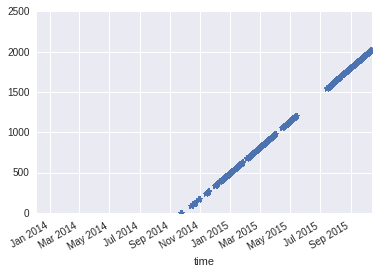

In [143]:
l1asum.orbit.plot(style='*')

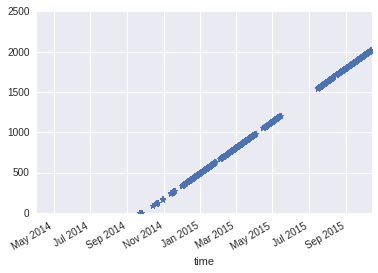

In [125]:
df.orbit.plot(style='*')

In [9]:
def process_hk_fname(fname):
    hkfile = hk.HKReader(str(fname))
    hkfile.temp_df.to_hdf('/home/klay6683/to_keep/HK_DB_stage.h5', 'df', mode='a',
                      format='table', append=True)

In [8]:
currenthknames = io.get_current_hk_fnames(env='stage')

In [10]:
from IPython.display import display
from ipywidgets import FloatText
ft = FloatText()
display(ft)
for i,fname in enumerate(currenthknames):
    ft.value = round(i*100/len(currenthknames), 1)
    process_hk_fname(fname)

In [38]:
from pathlib import Path
dbpath = Path('/home/klay6683/to_keep/HK_DB_stage.h5')
timestring = '20150101'
with pd.HDFStore(str(dbpath)) as store:
    c = store.select_column('df', 'index')
    where = c[pd.DatetimeIndex(c).date==pd.Timestamp(timestring).date()].index
    data = store.select('df', where=where)

In [40]:
instr_temps = ['FUV_CHIP_TEMP_C',
               'FUV_DET_TEMP_C',
               'FUV_INT_TEMP_C',
               'MUV_CHIP_TEMP_C',
               'MUV_DET_TEMP_C',
               'MUV_INT_TEMP_C']

iuvs_temps = ['IUVS_1_TEMP_C',
              'IUVS_2_TEMP_C',
              'IUVS_3_TEMP_C',
              'IUVS_4_TEMP_C']

htr_mot_temps = ['ZONE_1_HTR_TEMP_C', 'ZONE_2_HTR_TEMP_C',
                 'HV_POWR_TEMP_C', 'GRAT_MOT_TEMP_C', 'SCAN_MOT_TEMP_C']


In [42]:
set(data.columns) - set(instr_temps) - set(iuvs_temps) - set(htr_mot_temps)

{'IUVS_5_TEMP_C',
 'OP_1_HTR_TEMP_C',
 'OP_2_HTR_TEMP_C',
 'POWER_BD1_TEMP_C',
 'POWER_BD2_TEMP_C',
 'PROC_BD_TEMP_C'}

In [42]:
s = dtindex.to_series()

In [43]:
pd.DatetimeIndex(s)

DatetimeIndex(['2015-10-25', '2015-10-26', '2015-10-27', '2015-10-28',
               '2015-10-29', '2015-10-30'],
              dtype='datetime64[ns]', freq=None)

In [57]:
diff = pd.DatetimeIndex(pd.read_hdf(str(dbpath.parent / 'current_datediff.hdf')))

In [60]:
len(diff)

0

In [56]:
for index, row in hkfname_df.loc[diff].iterrows():
    print(index.date(), row.p)

2015-10-25 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151025_v001.fits.gz
2015-10-26 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151026_v001.fits.gz
2015-10-27 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151027_v002.fits.gz
2015-10-28 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151028_v001.fits.gz
2015-10-29 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151029_v001.fits.gz
2015-10-30 /maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151030_v001.fits.gz


In [12]:
hkfilename.__dict__

{'basename': 'mvn_iuv_analog_l0_20151030_v001.fits.gz',
 'datestring': '20151030',
 'instrument': 'iuv',
 'kind': 'analog',
 'level': 'l0',
 'mission': 'mvn',
 'obs_id': 'mvn_iuv_analog_l0_20151030',
 'p': PosixPath('/maven_iuvs/stage/products/housekeeping/level1a/mvn_iuv_analog_l0_20151030_v001.fits.gz'),
 'root': PosixPath('/maven_iuvs/stage/products/housekeeping/level1a'),
 'time': datetime.datetime(2015, 10, 30, 0, 0),
 'tokens': ['mvn', 'iuv', 'analog', 'l0', '20151030', 'v001.fits.gz'],
 'version': 'v001'}